***T5 Data Science Bootcamp***
# Predicting Video Games Global Sales

By Nouf Alotaibi
<br>
Email: noufmitla@gmail.com


### Table of Contents
- [Introduction](#Introduction)
- [Part I - Gather, Assess and Clean for (Kaggle, Metacritic, Whatoplay) Datasets](#Gather,AssessAndClean)
- [Part II - Merge Datasets](#MergeDatasets)
- [Part III - EDA](#EDA)
- [Part IV - Regression](#Regression)
- [Part V - Feature Engineering](#FeatureEngineering)
- [Part VI - Experiments](#Experiments)
- [Part VII - Conclusion](#Conclusion)

## Introduction

In this project, I will be investigating the relationship between the global sales of games and user/critic scores to predict the games' global sales and success. Also, test the effect of global sales on the game's play score, publisher, developer, genre, and other features. Moreover, I will get familiar with Machine Learning, web scraping techniques, and modeling methods such as Linear Regression and other Regression algorithems.

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time, os
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import statsmodels.formula.api as smf
from pandas_profiling import ProfileReport

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, scale
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

## Gather, Assess and Clean
Gather each of the three pieces of data as described below: 
>1. Kaggle Video Games Sales Dataset
>2. Metacritic Web Scraping
>3. Whatoplay Web Scraping

### 1. Kaggle Video Games Sales Dataset

In [4]:
games_sales_df = pd.read_csv("data/vgsales.csv")
games_sales_df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

####  Assess 

In [5]:
games_sales_df.shape

(16598, 11)

In [6]:
games_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
games_sales_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
games_sales_df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [9]:
games_sales_df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [10]:
games_sales_df[games_sales_df['Publisher']=="Unknown"]

Rank                                               Name Platform  \
940      942                    Gran Turismo Concept 2001 Tokyo      PS2   
1649    1651                                NASCAR Thunder 2003      PS2   
2114    2116                                       Suikoden III      PS2   
2173    2175                                   Wheel of Fortune      PS2   
2236    2238                       Teenage Mutant Ninja Turtles      GBA   
...      ...                                                ...      ...   
16460  16463     Horse Life 4: My Horse, My Friend, My Champion      3DS   
16493  16496                                         The Smurfs      3DS   
16532  16535                            STORM: Frontline Nation       PC   
16545  16548  The Treasures of Mystery Island 3 Pack - Save ...       PC   
16581  16584                                          Fit & Fun      Wii   

         Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  \
940    2001.0        Racing   Unknown      0.00      1.10      0.42   
1649      NaN        Racing   Unknown      0.60      0.46      0.00   
2114      NaN  Role-Playing   Unknown      0.29      0.23      0.38   
2173      NaN          Misc   Unknown      0.47      0.36      0.00   
2236   2003.0        Action   Unknown      0.67      0.25      0.00   
...       ...           ...       ...       ...       ...       ...   
16460  2015.0        Action   Unknown      0.00      0.01      0.00   
16493     NaN        Action   Unknown      0.00      0.01      0.00   
16532  2011.0      Strategy   Unknown      0.00      0.01      0.00   
16545  2011.0        Puzzle   Unknown      0.01      0.00      0.00   
16581  2011.0        Sports   Unknown      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
940           0.33          1.84  
1649          0.16          1.22  
2114          0.08          0.98  
2173          0.12          0.95  
2236          0.02          0.93  
...            ...           ...  
16460         0.00          0.01  
16493         0.00          0.01  
16532         0.00          0.01  
16545         0.00          0.01  
16581         0.00          0.01  

[203 rows x 11 columns]

> **Note:** 
    1. There are missing values labeled as 'nan' and 'Unknown'.
    2. There are duplicated values such as 'SquareSoft' is 'square', and 'Valve Software' is 'Valve'. 

In [11]:
games_sales_df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

> **Note:** There are missing values labeled as 'nan'.

In [12]:
games_sales_df['Name'].duplicated().sum()

5105

> **Note:** There are 5105 values. However, games may have differnet platforms. 

In [13]:
games_freq_df = games_sales_df.groupby(['Name', 'Platform']).size().reset_index(name='Freq')

print(sum(games_freq_df['Freq']==2))

5


In [14]:
games_freq_df[games_freq_df['Freq']==2]

Name Platform  Freq
7712                 Madden NFL 13      PS3     2
9622   Need for Speed: Most Wanted       PC     2
9627   Need for Speed: Most Wanted     X360     2
12701           Sonic the Hedgehog      PS3     2
15935  Wii de Asobu: Metroid Prime      Wii     2

> **Note:** It seems we have 5 games that have duplicates values here, lets check all of them!

In [15]:
duplicate_1 = games_sales_df[(games_sales_df['Name'] == "Madden NFL 13") & (games_sales_df['Platform'] == "PS3")]
duplicate_1

Rank           Name Platform    Year   Genre        Publisher  \
603      604  Madden NFL 13      PS3  2012.0  Sports  Electronic Arts   
16127  16130  Madden NFL 13      PS3  2012.0  Sports  Electronic Arts   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
603        2.11      0.23       0.0         0.22          2.56  
16127      0.00      0.01       0.0         0.00          0.01

- **duplicate_1** seem like it was a mistake. We can remove it.

In [16]:
duplicate_2 = games_sales_df[(games_sales_df['Name'] == "Need for Speed: Most Wanted") & (games_sales_df['Platform'] == "PC")]
duplicate_2

Rank                         Name Platform    Year   Genre  \
5900    5902  Need for Speed: Most Wanted       PC  2005.0  Racing   
11676  11678  Need for Speed: Most Wanted       PC  2012.0  Racing   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
5900   Electronic Arts      0.02      0.23       0.0         0.05   
11676  Electronic Arts      0.00      0.06       0.0         0.02   

       Global_Sales  
5900           0.30  
11676          0.08

In [17]:
duplicate_3 = games_sales_df[(games_sales_df['Name'] == "Need for Speed: Most Wanted") & (games_sales_df['Platform'] == "X360")]
duplicate_3

Rank                         Name Platform    Year   Genre  \
1173  1175  Need for Speed: Most Wanted     X360  2012.0  Racing   
1530  1532  Need for Speed: Most Wanted     X360  2005.0  Racing   

            Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1173  Electronic Arts      0.62      0.80      0.01         0.15          1.58  
1530  Electronic Arts      1.00      0.17      0.02         0.10          1.29

- After doing a little bit of research I found out that **duplicate_2** and **duplicate_3** are not actually duplicates. So, it means we have two options, either we remove them since the dataset is pretty much big, or we keep them and see how it goes when we merge the datasets. 

In [18]:
duplicate_4 = games_sales_df[(games_sales_df['Name'] == "Sonic the Hedgehog") & (games_sales_df['Platform'] == "PS3")]
duplicate_4

Rank                Name Platform    Year     Genre Publisher  NA_Sales  \
1715  1717  Sonic the Hedgehog      PS3  2006.0  Platform      Sega      0.41   
4145  4147  Sonic the Hedgehog      PS3     NaN  Platform       NaN      0.00   

      EU_Sales  JP_Sales  Other_Sales  Global_Sales  
1715      0.07      0.04         0.66          1.18  
4145      0.48      0.00         0.00          0.48

In [19]:
duplicate_5 = games_sales_df[(games_sales_df['Name'] == "Wii de Asobu: Metroid Prime") & (games_sales_df['Platform'] == "Wii")]
duplicate_5

Rank                         Name Platform  Year    Genre Publisher  \
14997  15000  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo   
14999  15002  Wii de Asobu: Metroid Prime      Wii   NaN  Shooter  Nintendo   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
14997       0.0       0.0      0.02          0.0          0.02  
14999       0.0       0.0      0.02          0.0          0.02

- For **duplicate_4** and **duplicate_5**, we will be dropping NaN values in year, so they do not matter.

#### Cleaning

In [20]:
games_sales_df = games_sales_df.rename(columns=str.lower)
games_sales_df = games_sales_df.rename(columns={'name': 'game_name'})
games_sales_df.columns

Index(['rank', 'game_name', 'platform', 'year', 'genre', 'publisher',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

- Let's drop the NaN values in 'year', and convert al NaN values in 'publisher' to Unknown.

In [21]:
games_sales_df = games_sales_df.drop(games_sales_df[games_sales_df['year'].isnull()].index).reset_index(drop=True)
games_sales_df['year'].isnull().sum()

0

In [22]:
games_sales_df['publisher'] = games_sales_df['publisher'].replace(np.nan, "Unknown")
games_sales_df['publisher'].isnull().sum()

0

In [23]:
games_sales_df

rank                                         game_name platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16322  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16323  16597                     Men in Black II: Alien Escape       GC   
16324  16598  SCORE International Baja 1000: The Official Game      PS2   
16325  16599                                        Know How 2       DS   
16326  16600                                  Spirits & Spells      GBA   

         year         genre   publisher  na_sales  eu_sales  jp_sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16322  2002.0      Platform       Kemco      0.01      0.00      0.00   
16323  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16324  2008.0        Racing  Activision      0.00      0.00      0.00   
16325  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16326  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       other_sales  global_sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16322         0.00          0.01  
16323         0.00          0.01  
16324         0.00          0.01  
16325         0.00          0.01  
16326         0.00          0.01  

[16327 rows x 11 columns]

In [24]:
games_sales_df['year'] = games_sales_df['year'].astype(int)
games_sales_df['year'] = games_sales_df['year'].astype(str)

In [25]:
games_sales_df['year'] = pd.to_datetime(games_sales_df['year'], format="%Y", utc=False).dt.year
games_sales_df['year']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16322    2002
16323    2003
16324    2008
16325    2010
16326    2003
Name: year, Length: 16327, dtype: int64

- Let's drop the duplicate_1 from the assess section.

In [26]:
duplicate_1 = games_sales_df[(games_sales_df['game_name'] == "Madden NFL 13") & (games_sales_df['platform'] == "PS3") & (games_sales_df['global_sales'] == 0.01)]
duplicate_1

rank      game_name platform  year   genre        publisher  na_sales  \
15866  16130  Madden NFL 13      PS3  2012  Sports  Electronic Arts       0.0   

       eu_sales  jp_sales  other_sales  global_sales  
15866      0.01       0.0          0.0          0.01

In [27]:
games_sales_df = games_sales_df[~((games_sales_df['game_name'] == "Madden NFL 13") & (games_sales_df['platform'] == "PS3") & (games_sales_df['global_sales'] == 0.01))]


In [28]:
games_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16326 entries, 0 to 16326
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16326 non-null  int64  
 1   game_name     16326 non-null  object 
 2   platform      16326 non-null  object 
 3   year          16326 non-null  int64  
 4   genre         16326 non-null  object 
 5   publisher     16326 non-null  object 
 6   na_sales      16326 non-null  float64
 7   eu_sales      16326 non-null  float64
 8   jp_sales      16326 non-null  float64
 9   other_sales   16326 non-null  float64
 10  global_sales  16326 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


- Let's rename the values of 'platform' so it can match the values in the other dataframes.

In [29]:
games_sales_df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [30]:
games_sales_df['platform'].replace({'NES':'Nostalgia.NES', 
                                      'GB':'Game Boy', 
                                      'X360':'Xbox 360', 
                                      'PS3':'PlayStation 3', 
                                      'PS2':'PlayStation 2', 
                                      'SNES':'Super Nintendo Entertainment System', 
                                      'GBA':'Game Boy Advance',
                                      'PS4':'PlayStation 4', 
                                      'N64':'Nintendo 64', 
                                      'PS':'PlayStation', 
                                      'XB':'Xbox',
                                      '2600':'Atari 2600', 
                                      'XOne':'Xbox One', 
                                      'GC':'GameCube', 
                                      'WiiU':'Wii U', 
                                      'PSV':'PlayStation Vita', 
                                      'SAT':'Sega Saturn', 
                                      'TG16':'TurboGrafx-16', 
                                      'PCFX':'PC-FX'}, inplace=True)

/Users/noufeclat/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
games_sales_df.head()

rank                 game_name       platform  year         genre  \
0     1                Wii Sports            Wii  2006        Sports   
1     2         Super Mario Bros.  Nostalgia.NES  1985      Platform   
2     3            Mario Kart Wii            Wii  2008        Racing   
3     4         Wii Sports Resort            Wii  2009        Sports   
4     5  Pokemon Red/Pokemon Blue       Game Boy  1996  Role-Playing   

  publisher  na_sales  eu_sales  jp_sales  other_sales  global_sales  
0  Nintendo     41.49     29.02      3.77         8.46         82.74  
1  Nintendo     29.08      3.58      6.81         0.77         40.24  
2  Nintendo     15.85     12.88      3.79         3.31         35.82  
3  Nintendo     15.75     11.01      3.28         2.96         33.00  
4  Nintendo     11.27      8.89     10.22         1.00         31.37

> The data looks cleaner than before! :)

### 2. Metacritic Web Scraping

In [32]:
def game_info(game_url):
    """Game Information: name, platform, publisher, release date, critics rating, users rating, game rate, genre"""

    user_agent = {'User-agent': 'Mozilla/5.0'}
    request_href = requests.get(game_url, headers = user_agent)
    soup_game = BeautifulSoup(request_href.content, "html.parser")
    game_info = {}
    
    time.sleep(1)
    
    try:
        game_name = soup_game.find("div", class_="product_title").a.text.strip() 
    except: 
        game_name = "none"
        print("Warning: game_name info not found.")
    #---------------------------------------------    
    try:
        platform = soup_game.find("div", class_="product_title").find("span", class_="platform").text.strip() 
    except: 
        platform = "none"
        print("Warning: platform info not found.")
    #---------------------------------------------  
    try:
        platforms = soup_game.find("div", class_="product_data").find("li", class_="summary_detail product_platforms").find_all("a")
        other_platforms = []
        for p in platforms:
            other_platforms.append(p.text)
    except: 
        other_platforms = "none"
        print("Warning: other_platforms info not found.")
    #---------------------------------------------  
    try:
        publisher = soup_game.find("div", class_="product_data").find("li", class_="summary_detail publisher").find("span", class_="data").a.text.strip() 
    except: 
        publisher = "none"
        print("Warning: publisher info not found.")
    #---------------------------------------------    
    try:
        release_date = soup_game.find("div", class_="product_data").find("li", class_="summary_detail release_data").find("span", class_="data").text 
    except: 
        release_date = "none"
        print("Warning: release_date info not found.")
     #---------------------------------------------  
    try:
        critics_rating = soup_game.find("div", class_='score_summary metascore_summary').find("a", class_="metascore_anchor").span.text 
    except: 
        critics_rating = "none"
        print("Warning: critics_rating info not found.")
    #---------------------------------------------  
    try:
        num_critics_rating = int(soup_game.find("div", class_="details main_details").find("div", class_="summary").find("span", class_="count").a.text.strip().split()[0])
    except: 
        num_critics_rating = np.nan
        print("Warning: num_critics_rating info not found.")
    #---------------------------------------------  
    try:
        users_rating = soup_game.find("div", class_='details side_details').find("a", class_="metascore_anchor").div.text 
    except: 
        users_rating = "none"
        print("Warning: users_rating info not found.")
    #---------------------------------------------  
    try:
        num_users_rating = int(soup_game.find("div", class_="details side_details").find("div", class_="summary").find("span", class_="count").a.text.strip().split()[0])
    except: 
        num_users_rating = np.nan
        print("Warning: num_users_rating info not found.")
    #---------------------------------------------  
    try:
        developer = soup_game.find("div", class_="section product_details").find("div", class_="details side_details").find("li", class_="summary_detail developer").a.text
    except: 
        developer = "none"
        print("Warning: developer info not found.")
    #---------------------------------------------  
    try:
        game_rate = soup_game.find("div", class_="section product_details").find("div", class_="details side_details").find("li", class_="summary_detail product_rating").find("span", class_="data").text 
    except: 
        game_rate = "none"
        print("Warning: game_rate info not found.")
     #--------------------------------------------- 
    try:
        genres = soup_game.find("div", class_="section product_details").find("div", class_="details side_details").find("li", class_="summary_detail product_genre").find_all("span", class_="data")
        game_genres = []
        for genre in genres:
            game_genres.append(genre.text)
    except: 
        game_genres = "none"
        print("Warning: genres info not found.")    
    
        
    game_info = {'game_name':game_name, 'platform':platform, 
                 'other_platforms':other_platforms, 'publisher':publisher, 
                 'developer':developer, 'release_date':release_date, 
                 'critics_rating':critics_rating, 'num_critics_rating':num_critics_rating, 
                 'users_rating':users_rating, 'num_users_rating':num_users_rating, 
                 'rate':game_rate, 'genre':game_genres}
    
    return game_info


In [33]:
def game_page_table(page_url):
    """Returns the games' links per table, all of them in one list"""
    
    user_agent = {'User-agent': 'Mozilla/5.0'}
    request_href = requests.get(page_url, headers = user_agent)
    soup_page = BeautifulSoup(request_href.content, "html.parser")
    
    # First table 
    games_1 = soup_page.find("div", class_="browse_list_wrapper one browse-list-large").find("table", class_="clamp-list").find_all("td", class_="clamp-image-wrap")
    games_1_links = []
    for game in games_1:
        games_1_links.append(game.find("a"))
        
    # Second table
    games_2 = soup_page.find("div", class_="browse_list_wrapper two browse-list-large").find("table", class_="clamp-list").find_all("td", class_="clamp-image-wrap")
    games_2_links = []
    for game in games_2:
        games_2_links.append(game.find("a"))
    
    # Third table
    games_3 = soup_page.find("div", class_="browse_list_wrapper three browse-list-large").find("table", class_="clamp-list").find_all("td", class_="clamp-image-wrap")
    games_3_links = []
    for game in games_3:
        games_3_links.append(game.find("a"))
    
    # Fourth table
    games_4 = soup_page.find("div", class_="browse_list_wrapper four browse-list-large").find("table", class_="clamp-list").find_all("td", class_="clamp-image-wrap")
    games_4_links = []
    for game in games_4:
        games_4_links.append(game.find("a"))
    
    return games_1_links+games_2_links+games_3_links+games_4_links

In [34]:
"""Metacritic Web Scraping Code"""

# base_url = "https://www.metacritic.com/"
# page_num = np.arange(0,21) 
# page_counter = 0
# games_list = []

# for page in page_num:
#     url = "https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page="+str(page)
#     driver = webdriver.Chrome(chromedriver)
#     driver.get(url)
    
#     page_counter += 1
#     game_counter = 0
    
#     time.sleep(1)
    
#     games_urls_list = game_page_table(url)

#     for game_url in games_urls_list:
#         game_counter += 1
#         print('-' * 115)  
#         print("Page",page_counter, ", Game", game_counter)
#         print("Game's Link: ",base_url+game_url['href'])
#         game_dict = game_info(base_url+game_url['href'])
#         print(game_dict)
#         games_list.append(game_dict)

'Metacritic Web Scraping Code'

In [35]:
# metacritic_games_dataset = games_df = pd.DataFrame(games_list)
# metacritic_games_dataset.head()

In [36]:
# metacritic_games_dataset.to_csv("metacritic_games_dataset", sep="@")

#### Assess

In [37]:
metacritic_games_df = pd.read_csv("data/metacritic_games_dataset", sep="@").iloc[:, 1:]
metacritic_games_df.head()

game_name       platform  \
0               The Legend of Zelda: Ocarina of Time    Nintendo 64   
1                           Tony Hawk's Pro Skater 2    PlayStation   
2                                Grand Theft Auto IV  PlayStation 3   
3  The House in Fata Morgana - Dreams of the Reve...         Switch   
4                                        SoulCalibur      Dreamcast   

         other_platforms          publisher                developer  \
0                   nonr           Nintendo                 Nintendo   
1  ['iPhone/iPad', 'PC']         Activision  Neversoft Entertainment   
2     ['PC', 'Xbox 360']     Rockstar Games           Rockstar North   
3                   nonr  Limited Run Games                    HuneX   
4                   nonr              Namco                    Namco   

   release_date critics_rating  num_critics_rating users_rating  \
0  Nov 23, 1998             99                22.0          9.1   
1  Sep 20, 2000             98                19.0          7.4   
2  Apr 29, 2008             98                64.0          7.7   
3  Apr  9, 2021             98                 8.0          8.2   
4  Sep  8, 1999             98                24.0          8.4   

   num_users_rating rate                                              genre  
0            6446.0    E                    ['Action Adventure', 'Fantasy']  
1             723.0    T         ['Sports', 'Alternative', 'Skateboarding']  
2            4167.0    M  ['Action Adventure', 'Modern', 'Modern', 'Open...  
3             495.0    M                      ['Adventure', 'Visual Novel']  
4             353.0    T                       ['Action', 'Fighting', '3D']

In [38]:
metacritic_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_name           5000 non-null   object 
 1   platform            5000 non-null   object 
 2   other_platforms     5000 non-null   object 
 3   publisher           5000 non-null   object 
 4   developer           5000 non-null   object 
 5   release_date        5000 non-null   object 
 6   critics_rating      5000 non-null   object 
 7   num_critics_rating  4952 non-null   float64
 8   users_rating        5000 non-null   object 
 9   num_users_rating    4887 non-null   float64
 10  rate                5000 non-null   object 
 11  genre               5000 non-null   object 
dtypes: float64(2), object(10)
memory usage: 468.9+ KB


In [39]:
metacritic_games_df['platform'].unique()

array(['Nintendo 64', 'PlayStation', 'PlayStation 3', 'Switch',
       'Dreamcast', 'Xbox 360', 'Wii', 'Xbox One', 'PlayStation 2',
       'PlayStation 4', 'PC', 'GameCube', 'Xbox', 'Wii U',
       'Game Boy Advance', '3DS', 'none', 'Xbox Series X', 'DS',
       'PlayStation Vita', 'PlayStation 5', 'PSP', 'Stadia'], dtype=object)

In [40]:
metacritic_games_df.describe()

num_critics_rating  num_users_rating
count         4952.000000       4887.000000
mean            31.157310        473.677103
std             22.130397       2554.252871
min              0.000000          4.000000
25%             14.000000         34.000000
50%             24.000000         99.000000
75%             43.000000        332.000000
max            126.000000     155446.000000

In [41]:
print("none in names:", sum(metacritic_games_df['game_name']=="none"))
print("none in platform:", sum(metacritic_games_df['platform']=="none"))
print("none in other_platforms:", sum(metacritic_games_df['other_platforms']=="nonr"))
print("none in publisher:", sum(metacritic_games_df['publisher']=="none"))
print("none in developer:", sum(metacritic_games_df['developer']=="none"))
print("none in release_date:", sum(metacritic_games_df['release_date']=="none"))
print("none in critics_rating:", sum(metacritic_games_df['critics_rating']=="none"))
print("none in users_rating:", sum(metacritic_games_df['users_rating']=="none"))
print("none in rate:", sum(metacritic_games_df['rate']=="none"))
print("none in genre:", sum(metacritic_games_df['genre']=="none"))

none in names: 48
none in platform: 48
none in other_platforms: 1595
none in publisher: 51
none in developer: 49
none in release_date: 48
none in critics_rating: 49
none in users_rating: 50
none in rate: 520
none in genre: 48


In [42]:
metacritic_games_df['num_critics_rating'].isnull().sum()

48

In [43]:
metacritic_games_df['num_users_rating'].isnull().sum()

113

In [44]:
len(metacritic_games_df[(metacritic_games_df['game_name'] == "none") & 
                    (metacritic_games_df['platform'] == "none") & 
                    (metacritic_games_df['publisher'] == "none") &
                    (metacritic_games_df['developer'] == "none") &
                    (metacritic_games_df['release_date'] == "none") &
                    (metacritic_games_df['critics_rating'] == "none") &
                    (metacritic_games_df['users_rating'] == "none") &
                    (metacritic_games_df['rate'] == "none") &
                    (metacritic_games_df['genre'] == "none") &
                    (metacritic_games_df['num_critics_rating'].isnull()) &
                    (metacritic_games_df['num_users_rating'].isnull())])

48

In [45]:
metacritic_games_df['game_name'].duplicated().sum()

1687

In [46]:
games_freq_df = metacritic_games_df.groupby(['game_name', 'platform']).size().reset_index(name='Freq')

print(sum(games_freq_df['Freq']==2))

0


#### *Quality Issues found in the metacritic_games_df:*

> Regarding NaN/missing values, we have in total:
    1. 48 missing records from the dataset
    2. Additional 3 missing values from publisher -> maybe convert to unknown
    3. Additional 1 missing values from developer -> maybe convert to unknown
    4. Additional 1 missing values from critics_rating -> maybe convert to unknown, 0, or -1
    5. Additional 2 missing values from users_rating -> maybe convert to unknown, 0, or -1
    6. Additional 472 missing values from rate -> maybe convert to unknown, or drop the whole column
    7. Additional 65 missing values in num_users_rating -> convert to 0
    8. Additional missing values from other_platforms -> drop the whole column

> Regarding completeness, validity, and accuracy:
    1. There are 'tbd' values in critics_rating, and users_rating
    2. release_date is not datetime type
    3. genre, other_platforms are list
    4. No need for other_platforms if game_name and platform both combined are unique
    5. developer and publisher may or may not be the same
    6. critics_rating should be int with (0-100) range
    7. users_rating should be float with (0-10) range
    8. num_critics_rating and num_users_rating should be both int 

#### Cleaning

In [47]:
metacritic_games_df = metacritic_games_df[~((metacritic_games_df['game_name'] == "none") & 
                                            (metacritic_games_df['platform'] == "none") & 
                                            (metacritic_games_df['publisher'] == "none") &
                                            (metacritic_games_df['developer'] == "none") &
                                            (metacritic_games_df['release_date'] == "none") &
                                            (metacritic_games_df['critics_rating'] == "none") &
                                            (metacritic_games_df['users_rating'] == "none") &
                                            (metacritic_games_df['rate'] == "none") &
                                            (metacritic_games_df['genre'] == "none") &
                                            (metacritic_games_df['num_critics_rating'].isnull()) &
                                            (metacritic_games_df['num_users_rating'].isnull()))]
metacritic_games_df.head()

game_name       platform  \
0               The Legend of Zelda: Ocarina of Time    Nintendo 64   
1                           Tony Hawk's Pro Skater 2    PlayStation   
2                                Grand Theft Auto IV  PlayStation 3   
3  The House in Fata Morgana - Dreams of the Reve...         Switch   
4                                        SoulCalibur      Dreamcast   

         other_platforms          publisher                developer  \
0                   nonr           Nintendo                 Nintendo   
1  ['iPhone/iPad', 'PC']         Activision  Neversoft Entertainment   
2     ['PC', 'Xbox 360']     Rockstar Games           Rockstar North   
3                   nonr  Limited Run Games                    HuneX   
4                   nonr              Namco                    Namco   

   release_date critics_rating  num_critics_rating users_rating  \
0  Nov 23, 1998             99                22.0          9.1   
1  Sep 20, 2000             98                19.0          7.4   
2  Apr 29, 2008             98                64.0          7.7   
3  Apr  9, 2021             98                 8.0          8.2   
4  Sep  8, 1999             98                24.0          8.4   

   num_users_rating rate                                              genre  
0            6446.0    E                    ['Action Adventure', 'Fantasy']  
1             723.0    T         ['Sports', 'Alternative', 'Skateboarding']  
2            4167.0    M  ['Action Adventure', 'Modern', 'Modern', 'Open...  
3             495.0    M                      ['Adventure', 'Visual Novel']  
4             353.0    T                       ['Action', 'Fighting', '3D']

In [48]:
print("tbd in critics_rating:", sum(metacritic_games_df['critics_rating'] == "tbd"))
print("tbd in users_rating:", sum(metacritic_games_df['users_rating'] == "tbd"))

tbd in critics_rating: 0
tbd in users_rating: 63


In [49]:
metacritic_games_df['users_rating'] = metacritic_games_df['users_rating'].replace(["tbd","none"], "0")
metacritic_games_df['critics_rating'] = metacritic_games_df['critics_rating'].replace("none", "0")
metacritic_games_df['rate'] = metacritic_games_df['rate'].replace("none", "unknown")
metacritic_games_df['num_users_rating'] = metacritic_games_df['num_users_rating'].replace(np.nan, 0)

In [50]:
metacritic_games_df['critics_rating'] = metacritic_games_df['critics_rating'].astype(np.int64)
metacritic_games_df['users_rating'] = metacritic_games_df['users_rating'].astype(float)
metacritic_games_df['num_critics_rating'] = metacritic_games_df['num_critics_rating'].astype(np.int64)
metacritic_games_df['num_users_rating'] = metacritic_games_df['num_users_rating'].astype(np.int64)

In [51]:
metacritic_games_df.drop('other_platforms', axis=1, inplace=True)

In [52]:
metacritic_games_df['release_date'] = pd.to_datetime(metacritic_games_df['release_date'], utc=False)
metacritic_games_df['release_date'] 

0      1998-11-23
1      2000-09-20
2      2008-04-29
3      2021-04-09
4      1999-09-08
          ...    
4995   2001-01-09
4996   2000-11-07
4997   2000-08-20
4998   2018-08-28
4999   2008-11-11
Name: release_date, Length: 4952, dtype: datetime64[ns]

In [53]:
metacritic_games_df['year'] = metacritic_games_df['release_date'].dt.year
metacritic_games_df['year']

0       1998
1       2000
2       2008
3       2021
4       1999
        ... 
4995    2001
4996    2000
4997    2000
4998    2018
4999    2008
Name: year, Length: 4952, dtype: int64

In [54]:
metacritic_games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4952 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   game_name           4952 non-null   object        
 1   platform            4952 non-null   object        
 2   publisher           4952 non-null   object        
 3   developer           4952 non-null   object        
 4   release_date        4952 non-null   datetime64[ns]
 5   critics_rating      4952 non-null   int64         
 6   num_critics_rating  4952 non-null   int64         
 7   users_rating        4952 non-null   float64       
 8   num_users_rating    4952 non-null   int64         
 9   rate                4952 non-null   object        
 10  genre               4952 non-null   object        
 11  year                4952 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 502.9+ KB


In [55]:
metacritic_games_df.head()

game_name       platform  \
0               The Legend of Zelda: Ocarina of Time    Nintendo 64   
1                           Tony Hawk's Pro Skater 2    PlayStation   
2                                Grand Theft Auto IV  PlayStation 3   
3  The House in Fata Morgana - Dreams of the Reve...         Switch   
4                                        SoulCalibur      Dreamcast   

           publisher                developer release_date  critics_rating  \
0           Nintendo                 Nintendo   1998-11-23              99   
1         Activision  Neversoft Entertainment   2000-09-20              98   
2     Rockstar Games           Rockstar North   2008-04-29              98   
3  Limited Run Games                    HuneX   2021-04-09              98   
4              Namco                    Namco   1999-09-08              98   

   num_critics_rating  users_rating  num_users_rating rate  \
0                  22           9.1              6446    E   
1                  19           7.4               723    T   
2                  64           7.7              4167    M   
3                   8           8.2               495    M   
4                  24           8.4               353    T   

                                               genre  year  
0                    ['Action Adventure', 'Fantasy']  1998  
1         ['Sports', 'Alternative', 'Skateboarding']  2000  
2  ['Action Adventure', 'Modern', 'Modern', 'Open...  2008  
3                      ['Adventure', 'Visual Novel']  2021  
4                       ['Action', 'Fighting', '3D']  1999

> **metacritic_games_df** looks clean and ready!

### 3. Whatoplay Web Scraping

In [56]:
"""Whatoplay Web Scraping Code"""

# total_games_list = []
# page_range = np.arange(1,514) 

# for page in page_range:
    
#     url = "https://whatoplay.com/best/"+str(page)
#     request_href = requests.get(url)
#     soup = BeautifulSoup(request_href.content, "html.parser")
    
#     games_html = soup.find("div", class_="game-list").find_all("div", class_="jsx-1456572130 game-item flex")
#     game_info = {}
#     games_list = [] 
    
#     for game in games_html:

#         #---------------------------------------------
#         try:
#             game_name = game.find("h3", class_="jsx-1456572130 mdc-typography--subtitle1 name").text
#         except: 
#             game_name = "none"
#             print("Warning: game_name info not found.")
#         #---------------------------------------------
#         try:    
#             platform = game.find("div", class_="jsx-1456572130 platform").text
#         except: 
#             platform = "none"
#             print("Warning: platform info not found.")
#         #---------------------------------------------
#         try:
#             temp = game.find("div", class_="playscore playscore-small").text
#             player_score = float(re.findall("\d+\.\d+", temp)[0])
#         except: 
#             player_score = np.nan
#             print("Warning: player_score info not found.")
#         #---------------------------------------------

#         game_info = {'game_name':game_name, 'platform':platform, 'player_score':player_score}
#         games_list.append(game_info)
    
#     total_games_list.extend(games_list)

'Whatoplay Web Scraping Code'

In [57]:
# whatoplay_games_dataset = games_df = pd.DataFrame(total_games_list)
# whatoplay_games_dataset.head()

In [58]:
# whatoplay_games_dataset.to_csv("whatoplay_games_dataset", sep="@")

####  Assess

In [59]:
whatoplay_games_df = pd.read_csv("data/whatoplay_games_dataset", sep="@").iloc[:, 1:]
whatoplay_games_df.head()

game_name  platform  player_score
0                       Grand Theft Auto V  Xbox 360          9.63
1                          Persona 5 Royal       PS4          9.58
2  The Legend of Zelda: Breath of the Wild    Switch          9.53
3                               God of War       PS4          9.52
4  The Legend of Zelda: Ocarina of Time 3D       3DS          9.50

In [60]:
whatoplay_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12825 entries, 0 to 12824
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   game_name     12825 non-null  object 
 1   platform      12825 non-null  object 
 2   player_score  12825 non-null  float64
dtypes: float64(1), object(2)
memory usage: 300.7+ KB


In [61]:
whatoplay_games_df['game_name'].nunique()

7726

In [62]:
whatoplay_games_df['platform'].unique()

array(['Xbox 360', 'PS4', 'Switch', '3DS', 'PC', 'Wii U', 'PS3',
       'Xbox One', 'PS Vita', 'PS5', 'iOS', 'Android', 'Xbox Series X'],
      dtype=object)

In [63]:
len(whatoplay_games_df[(whatoplay_games_df['game_name'] == "none") | 
                       (whatoplay_games_df['platform'] == "none") | 
                       (whatoplay_games_df['player_score'].isnull())])

0

In [64]:
games_freq_df = whatoplay_games_df.groupby(['game_name', 'platform']).size().reset_index(name='Freq')

print(sum(games_freq_df['Freq']==2))

5


In [65]:
games_freq_df[games_freq_df['Freq']==2]

game_name  platform  Freq
1965         Company of Crime        PC     2
3363   Espire 1: VR Operative        PC     2
5170                 Iron Man  Xbox 360     2
5944             Lock's Quest       PS4     2
6510  Might & Magic Heroes VI        PC     2

In [66]:
duplicate_1 = whatoplay_games_df[(whatoplay_games_df['game_name'] == "Company of Crime") & 
                                 (whatoplay_games_df['platform'] == "PC")]
duplicate_1

game_name platform  player_score
12499  Company of Crime       PC          6.37
12504  Company of Crime       PC          6.37

In [67]:
duplicate_2 = whatoplay_games_df[(whatoplay_games_df['game_name'] == "Espire 1: VR Operative") & 
                                 (whatoplay_games_df['platform'] == "PC")]
duplicate_2

game_name platform  player_score
12498  Espire 1: VR Operative       PC          6.37
12503  Espire 1: VR Operative       PC          6.37

In [68]:
duplicate_3 = whatoplay_games_df[(whatoplay_games_df['game_name'] == "Iron Man") & 
                                 (whatoplay_games_df['platform'] == "Xbox 360")]
duplicate_3

game_name  platform  player_score
12497  Iron Man  Xbox 360          6.37
12502  Iron Man  Xbox 360          6.37

In [69]:
duplicate_4 = whatoplay_games_df[(whatoplay_games_df['game_name'] == "Lock's Quest") & 
                                 (whatoplay_games_df['platform'] == "PS4")]
duplicate_4

game_name platform  player_score
12495  Lock's Quest      PS4          6.38
12500  Lock's Quest      PS4          6.38

In [70]:
duplicate_5 = whatoplay_games_df[(whatoplay_games_df['game_name'] == "Might & Magic Heroes VI") & 
                                 (whatoplay_games_df['platform'] == "PC")]
duplicate_5

game_name platform  player_score
12496  Might & Magic Heroes VI       PC          6.38
12501  Might & Magic Heroes VI       PC          6.38

#### Cleaning 

In [71]:
whatoplay_games_df = whatoplay_games_df.drop_duplicates(subset=['game_name', 'platform'])


In [72]:
whatoplay_games_df['platform'].replace({'PS3':'PlayStation 3', 'PS2':'PlayStation 2', 
                                        'PS4':'PlayStation 4', 'PS5':'PlayStation 5',
                                        'PS Vita':'PlayStation Vita'}, inplace=True)

In [73]:
whatoplay_games_df = whatoplay_games_df.rename(columns={'player_score': 'play_score'})

In [74]:
whatoplay_games_df.head()

game_name       platform  play_score
0                       Grand Theft Auto V       Xbox 360        9.63
1                          Persona 5 Royal  PlayStation 4        9.58
2  The Legend of Zelda: Breath of the Wild         Switch        9.53
3                               God of War  PlayStation 4        9.52
4  The Legend of Zelda: Ocarina of Time 3D            3DS        9.50

> **whatoplay_games_df** looks clean and ready!

## Merge all Datasets

In [75]:
print(games_sales_df.shape)
games_sales_df.head()

(16326, 11)


rank                 game_name       platform  year         genre  \
0     1                Wii Sports            Wii  2006        Sports   
1     2         Super Mario Bros.  Nostalgia.NES  1985      Platform   
2     3            Mario Kart Wii            Wii  2008        Racing   
3     4         Wii Sports Resort            Wii  2009        Sports   
4     5  Pokemon Red/Pokemon Blue       Game Boy  1996  Role-Playing   

  publisher  na_sales  eu_sales  jp_sales  other_sales  global_sales  
0  Nintendo     41.49     29.02      3.77         8.46         82.74  
1  Nintendo     29.08      3.58      6.81         0.77         40.24  
2  Nintendo     15.85     12.88      3.79         3.31         35.82  
3  Nintendo     15.75     11.01      3.28         2.96         33.00  
4  Nintendo     11.27      8.89     10.22         1.00         31.37

In [76]:
print(metacritic_games_df.shape)
metacritic_games_df.head()

(4952, 12)


game_name       platform  \
0               The Legend of Zelda: Ocarina of Time    Nintendo 64   
1                           Tony Hawk's Pro Skater 2    PlayStation   
2                                Grand Theft Auto IV  PlayStation 3   
3  The House in Fata Morgana - Dreams of the Reve...         Switch   
4                                        SoulCalibur      Dreamcast   

           publisher                developer release_date  critics_rating  \
0           Nintendo                 Nintendo   1998-11-23              99   
1         Activision  Neversoft Entertainment   2000-09-20              98   
2     Rockstar Games           Rockstar North   2008-04-29              98   
3  Limited Run Games                    HuneX   2021-04-09              98   
4              Namco                    Namco   1999-09-08              98   

   num_critics_rating  users_rating  num_users_rating rate  \
0                  22           9.1              6446    E   
1                  19           7.4               723    T   
2                  64           7.7              4167    M   
3                   8           8.2               495    M   
4                  24           8.4               353    T   

                                               genre  year  
0                    ['Action Adventure', 'Fantasy']  1998  
1         ['Sports', 'Alternative', 'Skateboarding']  2000  
2  ['Action Adventure', 'Modern', 'Modern', 'Open...  2008  
3                      ['Adventure', 'Visual Novel']  2021  
4                       ['Action', 'Fighting', '3D']  1999

In [77]:
print(whatoplay_games_df.shape)
whatoplay_games_df.head()

(12820, 3)


game_name       platform  play_score
0                       Grand Theft Auto V       Xbox 360        9.63
1                          Persona 5 Royal  PlayStation 4        9.58
2  The Legend of Zelda: Breath of the Wild         Switch        9.53
3                               God of War  PlayStation 4        9.52
4  The Legend of Zelda: Ocarina of Time 3D            3DS        9.50

> Since what makes a game record unique is **'game_name'** and **'platform'**, we will merge the datasets on them.

In [78]:
VideoGames_df_ = games_sales_df.merge(metacritic_games_df, on=['game_name', 'platform'], how="inner")


In [79]:
VideoGames_df_original = VideoGames_df_.merge(whatoplay_games_df, on=['game_name', 'platform'], how="inner")


## EDA

We will do a quick Exploratory Data Analysis on the 'VideoGames_df_original'.

In [80]:
VideoGames_df_original.head()

rank                       game_name       platform  year_x  genre_x  \
0    17              Grand Theft Auto V  PlayStation 3    2013   Action   
1    24              Grand Theft Auto V       Xbox 360    2013   Action   
2    30  Call of Duty: Modern Warfare 3       Xbox 360    2011  Shooter   
3    32         Call of Duty: Black Ops       Xbox 360    2010  Shooter   
4    35      Call of Duty: Black Ops II  PlayStation 3    2012  Shooter   

            publisher_x  na_sales  eu_sales  jp_sales  other_sales  ...  \
0  Take-Two Interactive      7.01      9.27      0.97         4.14  ...   
1  Take-Two Interactive      9.63      5.31      0.06         1.38  ...   
2            Activision      9.03      4.28      0.13         1.32  ...   
3            Activision      9.67      3.73      0.11         1.13  ...   
4            Activision      4.99      5.88      0.65         2.52  ...   

        developer release_date critics_rating num_critics_rating  \
0  Rockstar North   2013-09-17             97                 50   
1  Rockstar North   2013-09-17             97                 58   
2   Infinity Ward   2011-11-08             88                 81   
3        Treyarch   2010-11-09             87                 89   
4        Treyarch   2012-11-13             83                 21   

   users_rating  num_users_rating  rate  \
0           8.3              4719     M   
1           8.3              3990     M   
2           3.5              8631     M   
3           6.6              1662     M   
4           5.7              1116     M   

                                             genre_y year_y play_score  
0  ['Modern', 'Action Adventure', 'Modern', 'Open...   2013       9.28  
1  ['Modern', 'Action Adventure', 'Modern', 'Open...   2013       9.63  
2  ['Action', 'Shooter', 'Shooter', 'First-Person...   2011       8.53  
3  ['Action', 'Shooter', 'Shooter', 'First-Person...   2010       8.41  
4  ['Action', 'Shooter', 'Shooter', 'First-Person...   2012       7.84  

[5 rows x 22 columns]

In [81]:
cols = ['na_sales','eu_sales','jp_sales','other_sales','publisher_x','year_x','genre_y']
VideoGames_df_original.drop(columns=cols, axis=1, inplace=True)
VideoGames_df_original.columns


Index(['rank', 'game_name', 'platform', 'genre_x', 'global_sales',
       'publisher_y', 'developer', 'release_date', 'critics_rating',
       'num_critics_rating', 'users_rating', 'num_users_rating', 'rate',
       'year_y', 'play_score'],
      dtype='object')

In [82]:
VideoGames_df_original = VideoGames_df_original.rename(columns={'genre_x': 'genre', 'publisher_y':'publisher', 'year_y':'year'})
VideoGames_df_original.columns


Index(['rank', 'game_name', 'platform', 'genre', 'global_sales', 'publisher',
       'developer', 'release_date', 'critics_rating', 'num_critics_rating',
       'users_rating', 'num_users_rating', 'rate', 'year', 'play_score'],
      dtype='object')

<AxesSubplot:>

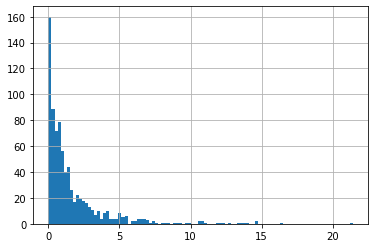

In [83]:
VideoGames_df_original['global_sales'].hist(bins=100)

/Users/noufeclat/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='global_sales'>

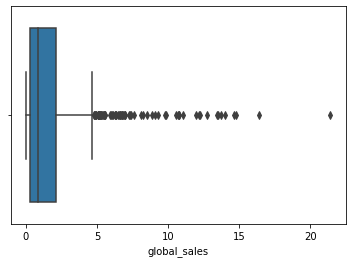

In [84]:
sns.boxplot(VideoGames_df_original['global_sales'])

> We can see that there is some outliers in 'global_sales'...Let's see what can we do with it later.

In [85]:
VideoGames_df_original['global_sales'] = VideoGames_df_original['global_sales']*1000000

In [86]:
# VideoGames_df_original.to_csv("games_original", sep="@")

In [87]:
VideoGames_df_original.head()

rank                       game_name       platform    genre  global_sales  \
0    17              Grand Theft Auto V  PlayStation 3   Action    21400000.0   
1    24              Grand Theft Auto V       Xbox 360   Action    16380000.0   
2    30  Call of Duty: Modern Warfare 3       Xbox 360  Shooter    14760000.0   
3    32         Call of Duty: Black Ops       Xbox 360  Shooter    14640000.0   
4    35      Call of Duty: Black Ops II  PlayStation 3  Shooter    14030000.0   

        publisher       developer release_date  critics_rating  \
0  Rockstar Games  Rockstar North   2013-09-17              97   
1  Rockstar Games  Rockstar North   2013-09-17              97   
2      Activision   Infinity Ward   2011-11-08              88   
3      Activision        Treyarch   2010-11-09              87   
4      Activision        Treyarch   2012-11-13              83   

   num_critics_rating  users_rating  num_users_rating rate  year  play_score  
0                  50           8.3              4719    M  2013        9.28  
1                  58           8.3              3990    M  2013        9.63  
2                  81           3.5              8631    M  2011        8.53  
3                  89           6.6              1662    M  2010        8.41  
4                  21           5.7              1116    M  2012        7.84

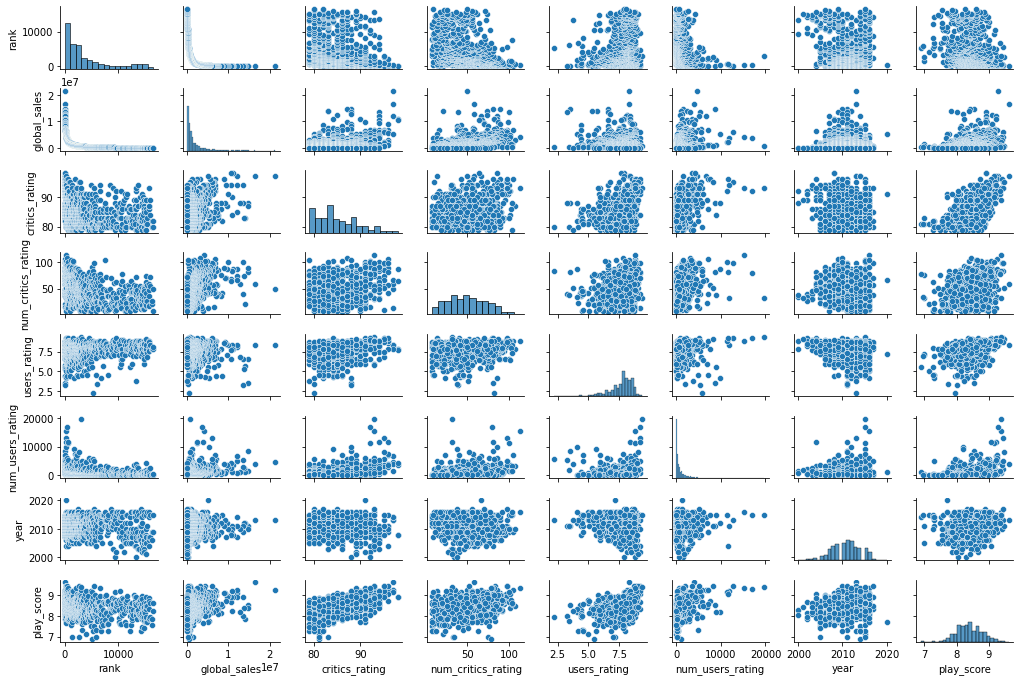

In [88]:
sns.pairplot(VideoGames_df_original, height=1.2, aspect=1.5)

In [89]:
VideoGames_df_original.corr()

rank  global_sales  critics_rating  \
rank                1.000000     -0.512048       -0.188869   
global_sales       -0.512048      1.000000        0.366004   
critics_rating     -0.188869      0.366004        1.000000   
num_critics_rating -0.402926      0.374192        0.232817   
users_rating        0.146664     -0.118938        0.275368   
num_users_rating   -0.144024      0.306386        0.450013   
year               -0.129563      0.019423       -0.107437   
play_score         -0.192799      0.278877        0.592798   

                    num_critics_rating  users_rating  num_users_rating  \
rank                         -0.402926      0.146664         -0.144024   
global_sales                  0.374192     -0.118938          0.306386   
critics_rating                0.232817      0.275368          0.450013   
num_critics_rating            1.000000      0.200937          0.256787   
users_rating                  0.200937      1.000000          0.057270   
num_users_rating              0.256787      0.057270          1.000000   
year                         -0.102623     -0.209448          0.118681   
play_score                    0.261144      0.438003          0.403841   

                        year  play_score  
rank               -0.129563   -0.192799  
global_sales        0.019423    0.278877  
critics_rating     -0.107437    0.592798  
num_critics_rating -0.102623    0.261144  
users_rating       -0.209448    0.438003  
num_users_rating    0.118681    0.403841  
year                1.000000    0.234547  
play_score          0.234547    1.000000

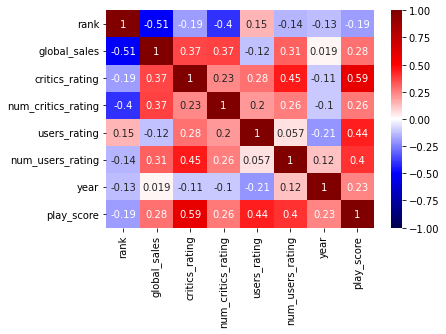

In [90]:
sns.heatmap(VideoGames_df_original.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);


In [91]:
VideoGames_df_original_profile = ProfileReport(VideoGames_df_original)
VideoGames_df_original_profile

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

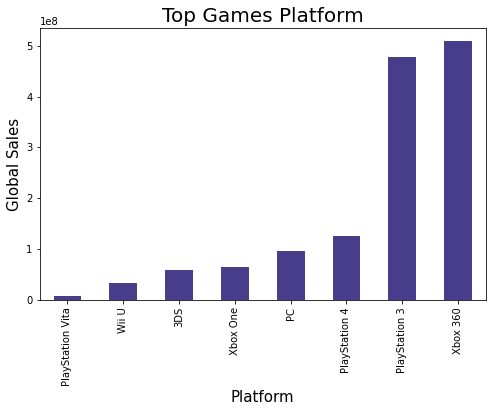

In [92]:
VideoGames_df_original.groupby('platform')['global_sales'].apply(sum).sort_values().plot.bar(figsize=(8, 5), color='darkslateblue')

plt.title('Top Games Platform', fontsize = 20)
plt.xlabel('Platform', fontsize = 15)
plt.ylabel('Global Sales', fontsize = 15)
plt.show();


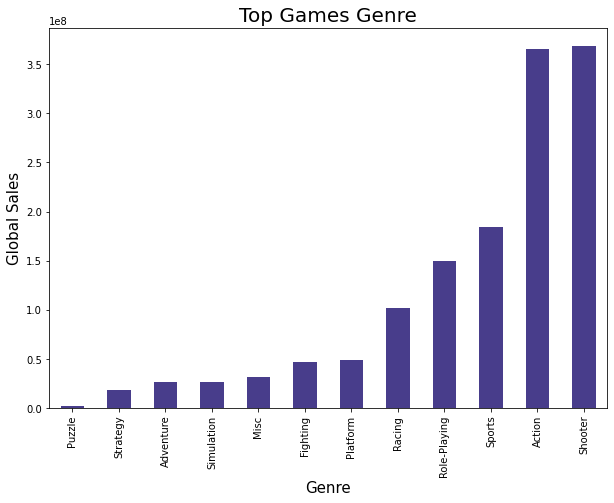

In [93]:
VideoGames_df_original.groupby('genre')['global_sales'].apply(sum).sort_values().plot.bar(figsize=(10, 7), color='darkslateblue')

plt.title('Top Games Genre', fontsize = 20)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Global Sales', fontsize = 15)
plt.show();


## Regression

### Split Data

In [94]:
cat_columns = ['global_sales','game_name','platform','genre','publisher','developer','release_date','rate']

def split_data(df): 
    """Split data into 60% train, 20% validation, and 20% test"""
    
    X = df.drop(columns=cat_columns, axis=1) # features
    y = df['global_sales'] # target
    
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

#---------------------------------------------------------------

def split_data_kmeans(df): 
    """Split data into 90% train and 10% test"""
    
    X = df.drop(columns=cat_columns, axis=1) # features
    y = df['global_sales'] # target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    
    return X_train, X_test, y_train, y_test


### Regression Algorithms

In [95]:
def linear_reg(X_train, y_train, X_val, y_val):
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    print(f"Training Score: {round(lm.score(X_train, y_train), 6)}")
    print(f"Validation Score: {round(lm.score(X_val, y_val), 6)}")
    return lm

#---------------------------------------------------------------

def linear_reg_kfold(X_train, y_train):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    #print Training score
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f"Training Score: {round(lm.score(X_train, y_train), 6)}")

    #print Validation score
    valid_scores = cross_val_score(lm, X_train, y_train, cv=kf)
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 6)}")
    return lm

#---------------------------------------------------------------

def ridge_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = RidgeCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
    
        print("Best score:", m.best_score_)
    else:
        m = Ridge(alpha = regular_var) 
        m.fit(X_train, y_train )
        
        valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
        print(f"Training Score: {round(m.score(X_train,y_train), 6)}")
        print(f"Validation Mean Score: {round(np.mean(valid_scores), 6)}")
    return m

#---------------------------------------------------------------

def lasso_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = LassoCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
        print("mean error:", m.mse_path_)
    else:
        m = Lasso(alpha = regular_var) 
        m.fit(X_train, y_train )

    valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
    print(f"Training Score: {round(m.score(X_train,y_train), 6)}")
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 6)}")
    return m

#---------------------------------------------------------------

def Random_Forest(X_train, y_train):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)

    valid_scores = cross_val_score(rf_regressor, X_train, y_train, cv=kf)
    print(f"Training Score: {round(rf_regressor.score(X_train,y_train), 6)}")
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 6)}")
    return rf_regressor

#---------------------------------------------------------------

def DecisionTree(X_train, y_train):
    
    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    
    dt_regressor = DecisionTreeRegressor(random_state = 0)
    dt_regressor.fit(X_train, y_train)

    valid_scores = cross_val_score(dt_regressor, X_train, y_train, cv=kf)
    print(f"Training Score: {round(dt_regressor.score(X_train,y_train), 6)}")
    print(f"Validation Score: {round(np.mean(valid_scores), 6)}")
    return dt_regressor

### Baseline Model: Linear Regression 

In [96]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(VideoGames_df_original)

lg_baseline_model = linear_reg(X_train, y_train, X_val, y_val)

Training Score: 0.390395
Validation Score: 0.388732


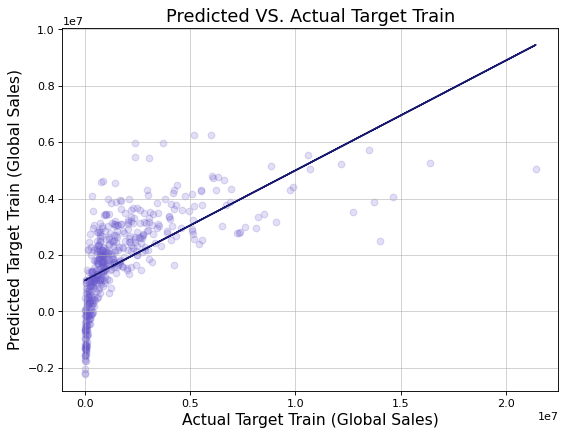

In [97]:
y_train_pred = lg_baseline_model.predict(X_train)
figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train (Global Sales)', fontsize=14)
plt.ylabel('Predicted Target Train (Global Sales)', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

## Feature Engineering

In [98]:
VideoGames_df = VideoGames_df_original.copy()

#### 1. Convert 'Genre' Into a Dummy Variable

In [99]:
VideoGames_df_copy = pd.get_dummies(VideoGames_df['genre'], drop_first=True)
VideoGames_df_dummy_1 = pd.concat([VideoGames_df, VideoGames_df_copy], axis=1)
VideoGames_df_dummy_1.head()

rank                       game_name       platform    genre  global_sales  \
0    17              Grand Theft Auto V  PlayStation 3   Action    21400000.0   
1    24              Grand Theft Auto V       Xbox 360   Action    16380000.0   
2    30  Call of Duty: Modern Warfare 3       Xbox 360  Shooter    14760000.0   
3    32         Call of Duty: Black Ops       Xbox 360  Shooter    14640000.0   
4    35      Call of Duty: Black Ops II  PlayStation 3  Shooter    14030000.0   

        publisher       developer release_date  critics_rating  \
0  Rockstar Games  Rockstar North   2013-09-17              97   
1  Rockstar Games  Rockstar North   2013-09-17              97   
2      Activision   Infinity Ward   2011-11-08              88   
3      Activision        Treyarch   2010-11-09              87   
4      Activision        Treyarch   2012-11-13              83   

   num_critics_rating  ...  Fighting  Misc Platform  Puzzle  Racing  \
0                  50  ...         0     0        0       0       0   
1                  58  ...         0     0        0       0       0   
2                  81  ...         0     0        0       0       0   
3                  89  ...         0     0        0       0       0   
4                  21  ...         0     0        0       0       0   

   Role-Playing  Shooter  Simulation  Sports  Strategy  
0             0        0           0       0         0  
1             0        0           0       0         0  
2             0        1           0       0         0  
3             0        1           0       0         0  
4             0        1           0       0         0  

[5 rows x 26 columns]

#### 2. Convert 'platform' Into a Dummy Variable

In [100]:
VideoGames_df_copy = pd.get_dummies(VideoGames_df['platform'], drop_first=True)
VideoGames_df_dummy_2 = pd.concat([VideoGames_df_dummy_1, VideoGames_df_copy], axis=1)
VideoGames_df_dummy_2.head()

rank                       game_name       platform    genre  global_sales  \
0    17              Grand Theft Auto V  PlayStation 3   Action    21400000.0   
1    24              Grand Theft Auto V       Xbox 360   Action    16380000.0   
2    30  Call of Duty: Modern Warfare 3       Xbox 360  Shooter    14760000.0   
3    32         Call of Duty: Black Ops       Xbox 360  Shooter    14640000.0   
4    35      Call of Duty: Black Ops II  PlayStation 3  Shooter    14030000.0   

        publisher       developer release_date  critics_rating  \
0  Rockstar Games  Rockstar North   2013-09-17              97   
1  Rockstar Games  Rockstar North   2013-09-17              97   
2      Activision   Infinity Ward   2011-11-08              88   
3      Activision        Treyarch   2010-11-09              87   
4      Activision        Treyarch   2012-11-13              83   

   num_critics_rating  ...  Simulation  Sports Strategy  PC  PlayStation 3  \
0                  50  ...           0       0        0   0              1   
1                  58  ...           0       0        0   0              0   
2                  81  ...           0       0        0   0              0   
3                  89  ...           0       0        0   0              0   
4                  21  ...           0       0        0   0              1   

   PlayStation 4  PlayStation Vita  Wii U  Xbox 360  Xbox One  
0              0                 0      0         0         0  
1              0                 0      0         1         0  
2              0                 0      0         1         0  
3              0                 0      0         1         0  
4              0                 0      0         0         0  

[5 rows x 33 columns]

#### 3. Convert 'rate' Into a Dummy Variable

In [101]:
VideoGames_df_copy = pd.get_dummies(VideoGames_df['rate'], drop_first=True)
VideoGames_df_dummy = pd.concat([VideoGames_df_dummy_2, VideoGames_df_copy], axis=1)
VideoGames_df_dummy.head()

rank                       game_name       platform    genre  global_sales  \
0    17              Grand Theft Auto V  PlayStation 3   Action    21400000.0   
1    24              Grand Theft Auto V       Xbox 360   Action    16380000.0   
2    30  Call of Duty: Modern Warfare 3       Xbox 360  Shooter    14760000.0   
3    32         Call of Duty: Black Ops       Xbox 360  Shooter    14640000.0   
4    35      Call of Duty: Black Ops II  PlayStation 3  Shooter    14030000.0   

        publisher       developer release_date  critics_rating  \
0  Rockstar Games  Rockstar North   2013-09-17              97   
1  Rockstar Games  Rockstar North   2013-09-17              97   
2      Activision   Infinity Ward   2011-11-08              88   
3      Activision        Treyarch   2010-11-09              87   
4      Activision        Treyarch   2012-11-13              83   

   num_critics_rating  ...  PlayStation 3  PlayStation 4 PlayStation Vita  \
0                  50  ...              1              0                0   
1                  58  ...              0              0                0   
2                  81  ...              0              0                0   
3                  89  ...              0              0                0   
4                  21  ...              1              0                0   

   Wii U  Xbox 360  Xbox One  E10+  M  T  unknown  
0      0         0         0     0  1  0        0  
1      0         1         0     0  1  0        0  
2      0         1         0     0  1  0        0  
3      0         1         0     0  1  0        0  
4      0         0         0     0  1  0        0  

[5 rows x 37 columns]

#### 4. Remove outliers

- Removed with np.log

In [102]:
# With dummy variables, and outliers removed with np.log
X_train, y_train, X_val, y_val, X_test, y_test = split_data(VideoGames_df_dummy)

lg_model = linear_reg(X_train, np.log(y_train), X_val, np.log(y_val))

Training Score: 0.944833
Validation Score: 0.93464


- Removed with is_outlier_IQR in 'global_sales'

In [103]:
def is_outlier_IQR(df):
    Q1 = df['global_sales'].quantile(0.25)
    Q3 = df['global_sales'].quantile(0.75)
    IQR = Q3 - Q1
    high = Q3 + 1.5 * IQR
    low = Q1 - 1.5 * IQR
    return df[~((df['global_sales'] < low) |(df['global_sales'] > high))]

In [104]:
# With dummy variables, and outliers removed with is_not_outlier in 'global_sales'

VideoGames_df_dummy_ol1 = is_outlier_IQR(VideoGames_df_dummy)

X_train, y_train, X_val, y_val, X_test, y_test = split_data(VideoGames_df_dummy_ol1)

model_3 = linear_reg(X_train, y_train, X_val, y_val)

Training Score: 0.593418
Validation Score: 0.489058


/Users/noufeclat/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='global_sales'>

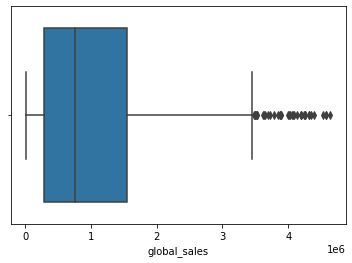

In [105]:
sns.boxplot(VideoGames_df_dummy_ol1['global_sales'])

- Removed with is_not_outlier in 'global_sales' per 'platform'

In [106]:
VideoGames_df_dummy.groupby('platform')['global_sales'].apply(sum)

platform
3DS                  59690000.0
PC                   95980000.0
PlayStation 3       477600000.0
PlayStation 4       125070000.0
PlayStation Vita      7570000.0
Wii U                33980000.0
Xbox 360            509000000.0
Xbox One             64560000.0
Name: global_sales, dtype: float64

In [107]:
def is_not_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return s.between(lower_limit, upper_limit)

In [108]:
# With dummy variables, and outliers removed with is_not_outlier in 'global_sales' per 'platform'

VideoGames_df_dummy_ol2 = VideoGames_df_dummy[VideoGames_df_dummy.groupby('platform')['global_sales'].apply(is_not_outlier)]

X_train, y_train, X_val, y_val, X_test, y_test = split_data(VideoGames_df_dummy_ol2)

model_3 = linear_reg(X_train, y_train, X_val, y_val)

Training Score: 0.5088
Validation Score: 0.489586


/Users/noufeclat/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='global_sales'>

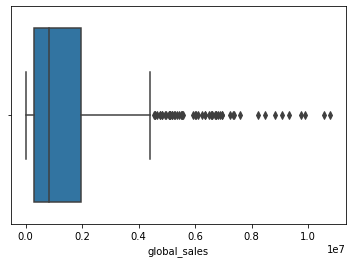

In [109]:
sns.boxplot(VideoGames_df_dummy_ol2['global_sales'])

> **Note:** Since removing the ouliers in 'global_sales' per platform makes more sense, I will continue working on the **VideoGames_df_dummy_ol2** dataframe.

#### 5. Create a new column 'platform_count' to count number of games per platform

In [110]:
VideoGames_df_dummy_ol2['platform_count'] = VideoGames_df_dummy_ol2.groupby(['platform'])['game_name'].transform('count')
VideoGames_df_dummy_ol2.head()

/Users/noufeclat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


rank                       game_name       platform     genre  \
13    54             Super Mario 3D Land            3DS  Platform   
16    57             Grand Theft Auto IV  PlayStation 3    Action   
17    63                     Halo: Reach       Xbox 360   Shooter   
18    66                          Halo 4       Xbox 360   Shooter   
19    71  Call of Duty 4: Modern Warfare       Xbox 360   Shooter   

    global_sales               publisher       developer release_date  \
13    10790000.0                Nintendo        Nintendo   2011-11-13   
16    10570000.0          Rockstar Games  Rockstar North   2008-04-29   
17     9880000.0  Microsoft Game Studios          Bungie   2010-09-14   
18     9760000.0  Microsoft Game Studios  343 Industries   2012-11-06   
19     9320000.0              Activision   Infinity Ward   2007-11-05   

    critics_rating  num_critics_rating  ...  PlayStation 4  PlayStation Vita  \
13              90                  82  ...              0                 0   
16              98                  64  ...              0                 0   
17              91                  99  ...              0                 0   
18              87                  87  ...              0                 0   
19              94                  70  ...              0                 0   

   Wii U  Xbox 360  Xbox One  E10+  M  T  unknown  platform_count  
13     0         0         0     0  0  0        0              28  
16     0         0         0     0  1  0        0             201  
17     0         1         0     0  1  0        0             214  
18     0         1         0     0  1  0        0             214  
19     0         1         0     0  1  0        0             214  

[5 rows x 38 columns]

#### 6. Rescaling 'global_sales'

In [111]:
VideoGames_df_dummy_ol2[['global_sales']] = StandardScaler().fit_transform(VideoGames_df_dummy_ol2[['global_sales']])


/Users/noufeclat/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [112]:
VideoGames_df_new = VideoGames_df_dummy_ol2.copy()
VideoGames_df_new.head()

rank                       game_name       platform     genre  \
13    54             Super Mario 3D Land            3DS  Platform   
16    57             Grand Theft Auto IV  PlayStation 3    Action   
17    63                     Halo: Reach       Xbox 360   Shooter   
18    66                          Halo 4       Xbox 360   Shooter   
19    71  Call of Duty 4: Modern Warfare       Xbox 360   Shooter   

    global_sales               publisher       developer release_date  \
13      5.307389                Nintendo        Nintendo   2011-11-13   
16      5.182197          Rockstar Games  Rockstar North   2008-04-29   
17      4.789549  Microsoft Game Studios          Bungie   2010-09-14   
18      4.721262  Microsoft Game Studios  343 Industries   2012-11-06   
19      4.470878              Activision   Infinity Ward   2007-11-05   

    critics_rating  num_critics_rating  ...  PlayStation 4  PlayStation Vita  \
13              90                  82  ...              0                 0   
16              98                  64  ...              0                 0   
17              91                  99  ...              0                 0   
18              87                  87  ...              0                 0   
19              94                  70  ...              0                 0   

   Wii U  Xbox 360  Xbox One  E10+  M  T  unknown  platform_count  
13     0         0         0     0  0  0        0              28  
16     0         0         0     0  1  0        0             201  
17     0         1         0     0  1  0        0             214  
18     0         1         0     0  1  0        0             214  
19     0         1         0     0  1  0        0             214  

[5 rows x 38 columns]

## Experiments

In [113]:
X_train, y_train, X_val, y_val, X_test, y_test =  split_data(VideoGames_df_new)

### Experiment 1: Linear Regression

In [114]:
lg_model = linear_reg(X_train, y_train, X_val, y_val)

Training Score: 0.491503
Validation Score: 0.495262


So, there is an improvment after some feature engineering. However, the learning process is still unstable due to target variable which is global_sales have large spread of values, we need to use cross-validation.

### Experiment 1.1: Linear Regression With Cross Validation

In [115]:
lg_model_cv = linear_reg_kfold(X_train, y_train)

Training Score: 0.491503
Validation Mean Score: 0.369763


### Experiment 2: Ridge Regression 

In [116]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [117]:
red_model.fit(X_train_scaled, y_train)

print(f'Ridge Regression val R^2: {red_model.score(X_val_scaled, y_val):.3f}')

Ridge Regression val R^2: 0.496


### Experiment 2.1: Ridge Regression With Cross Validation

In [118]:
red_model_cv = ridge_model(X_train, y_train)

Training Score: 0.491
Validation Mean Score: 0.381708


### Experiment 3: Polynomial Regression (degree = 2)

In [119]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

In [120]:
poly_model.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {poly_model.score(X_val_poly, y_val):.3f}')

Degree 2 polynomial regression val R^2: -234.052


### Experiment 4: Lasso Regression With Cross Validation

In [121]:
lasso_model_cv = lasso_model(X_train, y_train, CV_flag = True)

mean error: [[0.70934385 0.54956001 0.52374145 0.60464493 0.81935585]
 [0.66983779 0.54457439 0.55306172 0.58196168 0.76926308]
 [0.66168842 0.54822733 0.55860096 0.60131785 0.73483819]]
Training Score: 0.490256
Validation Mean Score: 0.397295


### Experiment 7: Decision Tree Regression With Cross Validation

In [122]:
dt_regressor = DecisionTree(X_train, y_train)


Training Score: 1.0
Validation Score: 0.996289


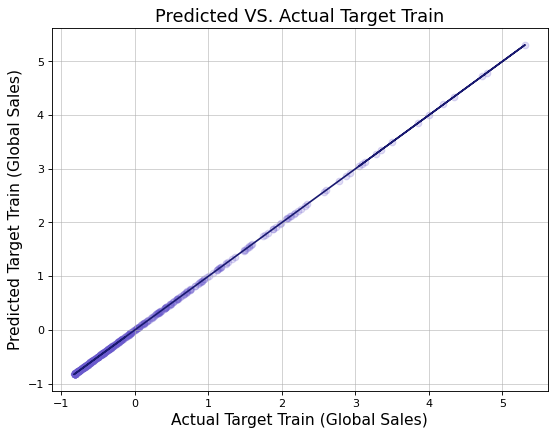

In [123]:
y_train_pred = dt_regressor.predict(X_train)
figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train (Global Sales)', fontsize=14)
plt.ylabel('Predicted Target Train (Global Sales)', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

### Experiment 6: Random Forest Regression With Cross Validation

In [124]:
rf_regressor = Random_Forest(X_train, y_train)


Training Score: 0.999516
Validation Mean Score: 0.99769


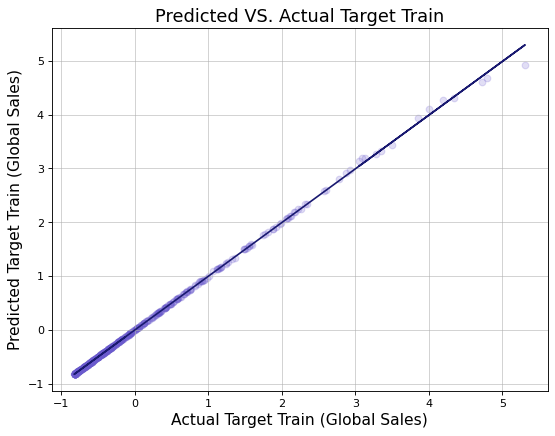

In [125]:
y_train_pred = rf_regressor.predict(X_train)
figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train (Global Sales)', fontsize=14)
plt.ylabel('Predicted Target Train (Global Sales)', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

## Conclusion

- Random Forest and Decision Tree Regression algorithms with Cross-Validation has the best results.
- Linear Regression, Ridge Regression, Lasso Regression with Cross-Validation has similar scores. 
- Polynomial Regression doesn't seem to suit the dataset. 
- The target variable 'global_sales' with a large spread of values may result in making the learning process unstable.
- Consider improving the model stability and performance by scaling.